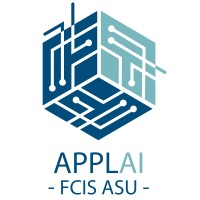

# **Data Description :** 


This data represents some of the data gathered in a year of research, on 3 coasts which represent a pollution gradient.

Month : Month of the year

Season : seasons starting with 4 which is summer and so on

Shore : each number is a different shore

Pollution Level : clean coast 0 most polluted 2

Sample number : each month a few soil samples were taken for analyze

Organic matter% : OM% in soil sample

Mean Number of Nematode species 1 per gram soil : species

Mean Number of Turbillaria per gram soil : species

Mean Number of foraminefera per gram soil : species

Mean Number of Nematode species 2 per gram soil : species

Water pH

Soil pH

Water Salinity : as mentioned

Soil Salinity : as mentioned

P : Soil porosity

* All other columns reprsenets water


# **Understanding Dataset :**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Shore_Pollution.csv',encoding = 'unicode_escape')

In [ ]:
df.head()

,Month,Season,Shore,Pollution Level,Sample number,Organic matter%,Mean Number of Nematode species 1 per gram soil,Mean Number of Turbillaria per gram soil,Mean Number of foraminefera per gram soil,Mean Number of Nematode species 2 per gram soil,...,PP,Conduction,ORP,Specific resistance,Temp ©,Conductivity,H,C-A,C-B,C-C
0,8,4,1,0,1,NaN,5.700000,0.155556,NaN,NaN,...,196.3,57400.0,-79.9,17.42,30.12,NaN,NaN,NaN,NaN,NaN
1,8,4,1,0,2,NaN,3.288889,0.066667,NaN,NaN,...,196.3,57400.0,-79.9,17.42,30.12,NaN,NaN,NaN,NaN,NaN
2,8,4,1,0,3,NaN,8.444444,0.000000,NaN,NaN,...,196.3,57400.0,-79.9,17.42,30.12,NaN,NaN,NaN,NaN,NaN
3,8,4,1,0,4,NaN,1.866667,0.000000,NaN,NaN,...,196.3,57400.0,-79.9,17.42,30.12,NaN,NaN,NaN,NaN,NaN
4,8,4,1,0,5,NaN,3.377778,0.022222,NaN,NaN,...,196.3,57400.0,-79.9,17.42,30.12,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dimension of dataset
df.shape

(219, 27)

In [ ]:
df.columns

Index(['Month', 'Season', 'Shore', 'Pollution Level', 'Sample number',
       'Organic matter%', 'Mean Number of Nematode species 1 per gram soil',
       'Mean Number of Turbillaria per gram soil',
       'Mean Number of foraminefera per gram soil',
       'Mean Number of Nematode species 2 per gram soil', 'Water pH',
       'Soil pH', 'OC', 'Water Salinity', 'Soil Salinity', 'P',
       'Total dissolved solids ', 'PP', 'Conduction', 'ORP',
       'Specific resistance ', 'Temp ©', 'Conductivity', 'H', 'C-A', 'C-B',
       'C-C'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Month                                            219 non-null    int64  
 1   Season                                           219 non-null    int64  
 2   Shore                                            219 non-null    int64  
 3   Pollution Level                                  219 non-null    int64  
 4   Sample number                                    219 non-null    int64  
 5   Organic matter%                                  202 non-null    float64
 6   Mean Number of Nematode species 1 per gram soil  219 non-null    float64
 7   Mean Number of Turbillaria per gram soil         219 non-null    float64
 8   Mean Number of foraminefera per gram soil        147 non-null    float64
 9   Mean Number of Nematode species 

We can conclude that 
* our data is numerical data , no categorical columns are found  
* We have null values in some columns 

Let's focus on them

In [ ]:
df.isnull().sum()

Month                                                0
Season                                               0
Shore                                                0
Pollution Level                                      0
Sample number                                        0
Organic matter%                                     17
Mean Number of Nematode species 1 per gram soil      0
Mean Number of Turbillaria per gram soil             0
Mean Number of foraminefera per gram soil           72
Mean Number of Nematode species 2 per gram soil     72
Water pH                                             0
Soil pH                                              0
OC                                                  14
Water Salinity                                       0
Soil Salinity                                        7
P                                                    0
Total dissolved solids                              14
PP                                                  14
Conduction

In [ ]:
nulls=df.isnull().sum()
nulls = round(nulls[nulls!=0] / 3276*100, 2)
nulls

Organic matter%                                    0.52
Mean Number of foraminefera per gram soil          2.20
Mean Number of Nematode species 2 per gram soil    2.20
OC                                                 0.43
Soil Salinity                                      0.21
Total dissolved solids                             0.43
PP                                                 0.43
Specific resistance                                0.43
Conductivity                                       1.34
H                                                  1.34
C-A                                                3.05
C-B                                                3.05
C-C                                                3.05
dtype: float64

For all columns it's a low percentage so we won't remove them except for the last 3 columns , so let's handle them but after understanding every column well !

In [ ]:
df['Month'].unique()

array([ 8,  9, 11,  1,  3,  5, 18], dtype=int64)

After analyzing the data I realised that month 18 represents the same season as month 8 but in the following year , we are not considering years in our data we only consider seasons so we will replace 18 with 8 as they both are the same season 

In [ ]:
df['Month'] = df['Month'].replace(18,8)

In [ ]:
df['Month'].unique()

array([ 8,  9, 11,  1,  3,  5], dtype=int64)

In [ ]:
df['Season'].unique()

array([4, 1, 2, 3], dtype=int64)

* `4` represents Summer
* `3` represents Fall
* `2` represents Winter 
* `1` represents Spring 

In [ ]:
df['Shore'].unique()

array([1, 2, 3], dtype=int64)

We have 3 different shores in our dataset

In [ ]:
df['Pollution Level'].unique()

array([0, 2, 1], dtype=int64)

* `0` represents clean coast
* `1` represents polluted coast
* `2` represents most polluted

In [ ]:
df['Sample number'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [ ]:
df['Organic matter%'].unique()

array([       nan, 0.25601903, 0.35908034, 0.3625628 , 0.48340399,
       0.3541699 , 0.30848329, 0.53272451, 0.2673147 , 1.05588463,
       1.86802523, 0.89040741, 0.60293965, 0.50482823, 0.34955981,
       0.3129769 , 0.30880082, 0.22343595, 0.2814739 , 0.28321318,
       0.28387097, 0.50175615, 0.25713551, 0.35823951, 0.51692944,
       0.30808729, 0.22053418, 0.41247744, 0.12118274, 0.3236246 ,
       0.21024563, 0.4866524 , 0.30506635, 0.36063015, 0.25272503,
       0.36745291, 0.29619151, 0.21866751, 0.3602112 , 0.36869574,
       0.24183538, 0.29326847, 0.35939758, 0.265179  , 0.3344247 ,
       0.32553252, 0.3383042 , 0.54141989, 0.30005456, 0.27422304,
       0.26296966, 0.25976457, 0.27175671, 0.28424146, 0.27055777,
       0.26348067, 0.72816942, 0.57056341, 0.70527185, 0.84577114,
       0.81116381, 0.67603936, 0.67180847, 0.68775216, 0.44016571,
       0.46467776, 0.58860156, 0.81071885, 0.5789299 , 0.83701658,
       0.70408469, 0.63284573, 0.74542233, 0.50528525, 0.61806

OM% in soil sample are numbers that ranges between `0.12` to `1.87`

In [ ]:
df_temp = df[["Specific resistance ","PP","Total dissolved solids ",'OC','Soil Salinity','Organic matter%']]

# **Data Preprocessing :**

we will replace null values with Knn Imputer

The idea in KNN methods is to identify **k** samples in the dataset that are similar or close in the space. Then we use these **k** samples to estimate the value of the missing data points. Each sample’s missing values are imputed using the mean value of the k-neighbors found in the dataset.

In [ ]:
from sklearn.impute import KNNImputer 
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.isna().sum() 
df

,Month,Season,Shore,Pollution Level,Sample number,Organic matter%,Mean Number of Nematode species 1 per gram soil,Mean Number of Turbillaria per gram soil,Mean Number of foraminefera per gram soil,Mean Number of Nematode species 2 per gram soil,...,PP,Conduction,ORP,Specific resistance,Temp ©,Conductivity,H,C-A,C-B,C-C
0,8.0,4.0,1.0,0.0,1.0,0.388430,5.700000,0.155556,0.000000,3.200000,...,196.3,57400.0,-79.9,17.42,30.120000,3.0639,0.0968,8.220065,8.967643,11.445232
1,8.0,4.0,1.0,0.0,2.0,0.388430,3.288889,0.066667,0.000000,3.200000,...,196.3,57400.0,-79.9,17.42,30.120000,3.0639,0.0968,8.220065,8.967643,11.445232
2,8.0,4.0,1.0,0.0,3.0,0.388430,8.444444,0.000000,0.000000,3.200000,...,196.3,57400.0,-79.9,17.42,30.120000,3.0639,0.0968,8.220065,8.967643,11.445232
3,8.0,4.0,1.0,0.0,4.0,0.332185,1.866667,0.000000,0.000000,3.200000,...,196.3,57400.0,-79.9,17.42,30.120000,3.0639,0.0968,8.220065,8.967643,11.445232
4,8.0,4.0,1.0,0.0,5.0,0.363254,3.377778,0.022222,0.000000,3.200000,...,196.3,57400.0,-79.9,17.42,30.120000,3.0639,0.0968,8.220065,8.967643,11.445232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,8.0,4.0,3.0,1.0,3.0,0.441743,23.746390,0.424991,2.047667,0.682556,...,214.0,58800.0,-84.0,17.00,30.247059,2.2878,0.1002,10.385330,13.094469,16.265119
215,8.0,4.0,3.0,1.0,4.0,0.411651,12.399942,0.307437,0.682556,13.651116,...,214.0,58800.0,-84.0,17.00,30.247059,2.2878,0.1002,10.385330,13.094469,16.265119
216,8.0,4.0,3.0,1.0,5.0,0.414801,7.520223,0.423675,0.000000,6.143002,...,214.0,58800.0,-84.0,17.00,30.247059,2.2878,0.1002,10.385330,13.094469,16.265119
217,8.0,4.0,3.0,1.0,6.0,0.386704,23.726578,0.644160,0.682556,6.143002,...,214.0,58800.0,-84.0,17.00,30.247059,2.2878,0.1002,10.385330,13.094469,16.265119


In [ ]:
df.isnull().sum()

Month                                              0
Season                                             0
Shore                                              0
Pollution Level                                    0
Sample number                                      0
Organic matter%                                    0
Mean Number of Nematode species 1 per gram soil    0
Mean Number of Turbillaria per gram soil           0
Mean Number of foraminefera per gram soil          0
Mean Number of Nematode species 2 per gram soil    0
Water pH                                           0
Soil pH                                            0
OC                                                 0
Water Salinity                                     0
Soil Salinity                                      0
P                                                  0
Total dissolved solids                             0
PP                                                 0
Conduction                                    

Now Our data is cleaned ! 

<AxesSubplot: >

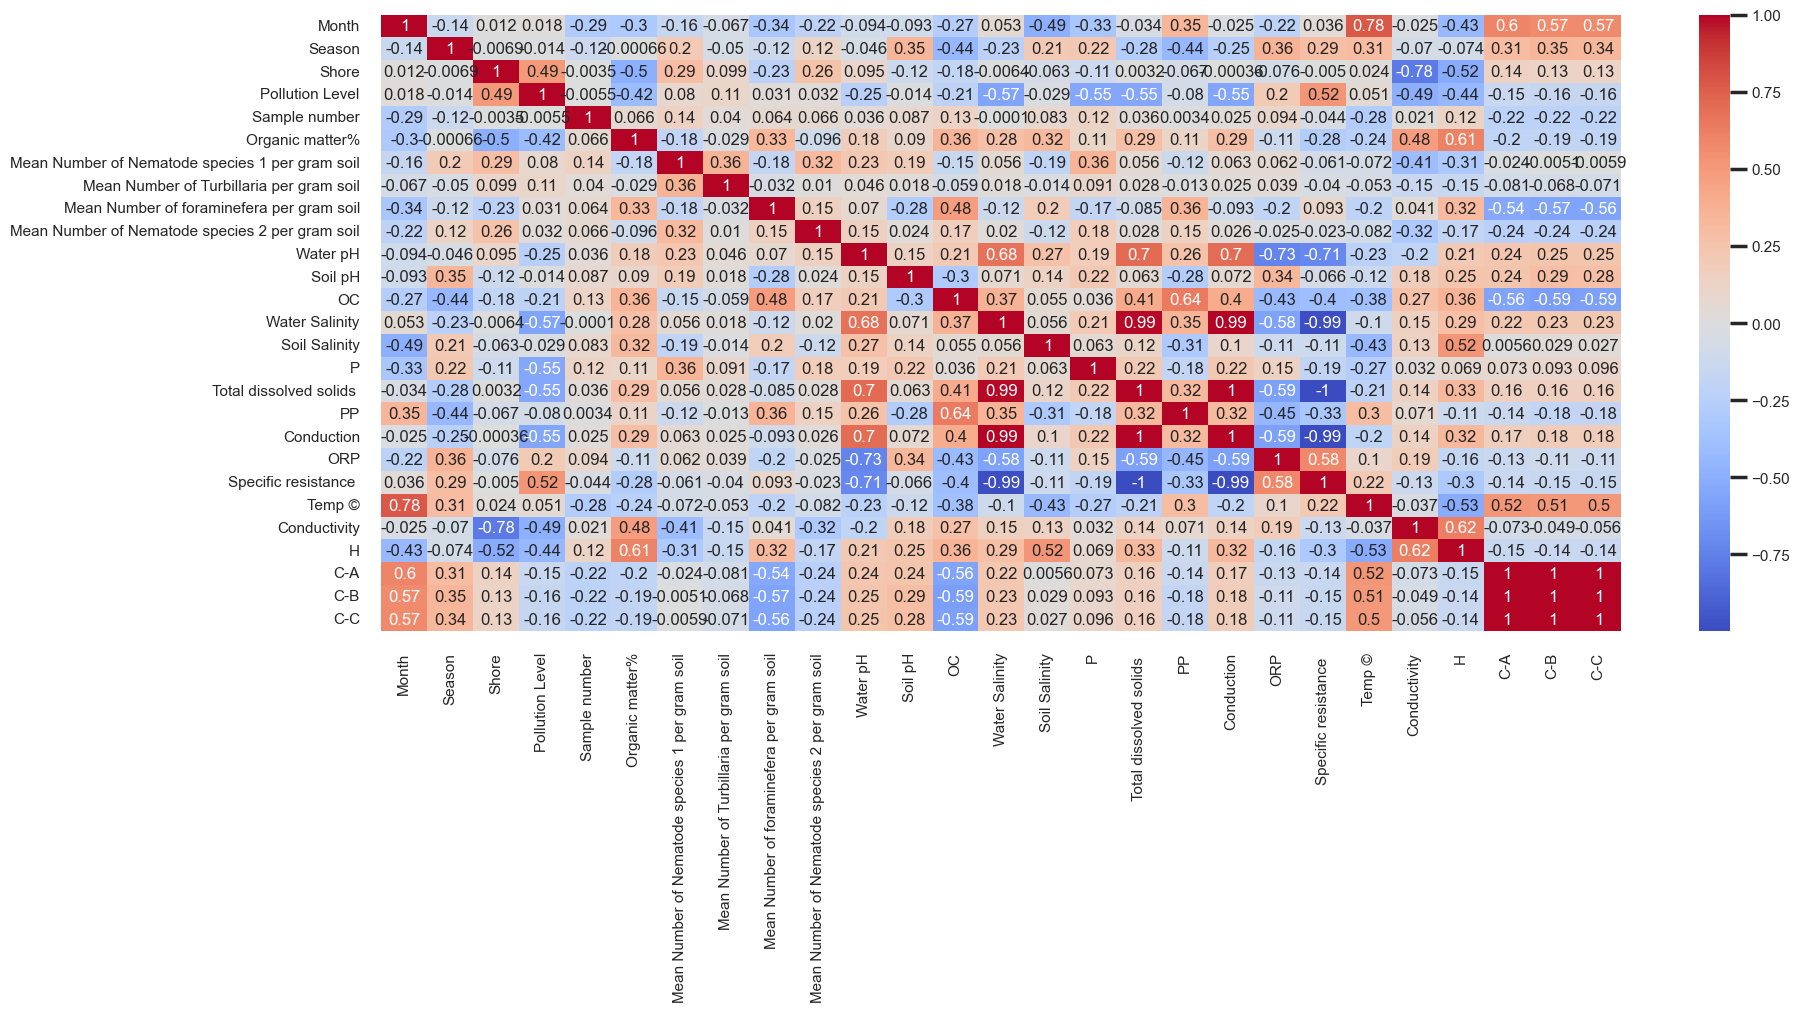

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, ax=ax)

In [ ]:
df['Shore'].value_counts()

2.0    74
3.0    73
1.0    72
Name: Shore, dtype: int64

In [ ]:
df['Pollution Level'].value_counts()

2.0    74
1.0    73
0.0    72
Name: Pollution Level, dtype: int64

# **Exploratory Data Analysis :** 

In [ ]:
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})

Text(0.5, 1.0, 'Pollution Levels by Season')

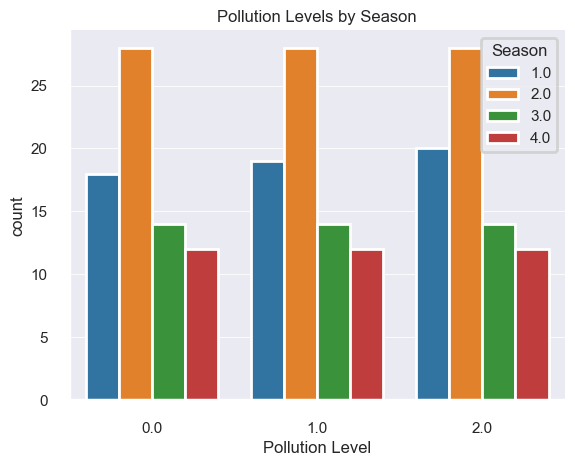

In [ ]:
h = sns.countplot(x="Pollution Level",hue='Season' ,data=df)
sns.despine()
plt.title("Pollution Levels by Season")

Text(0.5, 1.0, 'Monthly Analysis of Pollution Levels:')

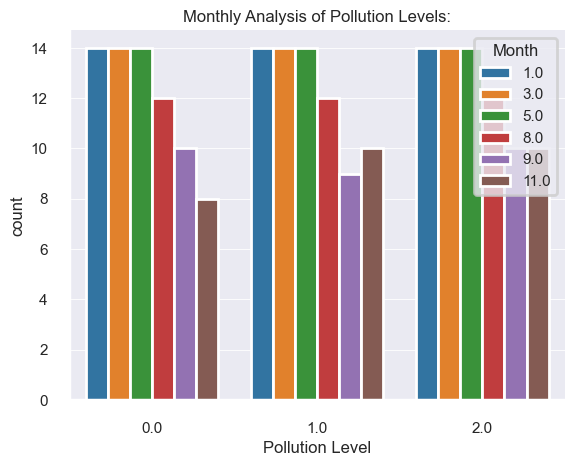

In [ ]:
h = sns.countplot(x="Pollution Level",hue='Month' ,data=df)
sns.despine()
plt.title("Monthly Analysis of Pollution Levels:")

Text(0.5, 1.0, 'Shore-Wise Analysis of Pollution Levels')

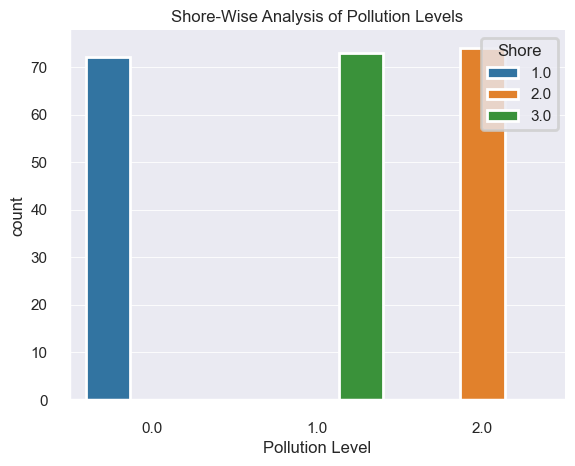

In [ ]:
h = sns.countplot(x="Pollution Level",hue='Shore' ,data=df)
sns.despine()
plt.title("Shore-Wise Analysis of Pollution Levels")

Text(0.5, 1.0, 'Seasonal Variation in Months')

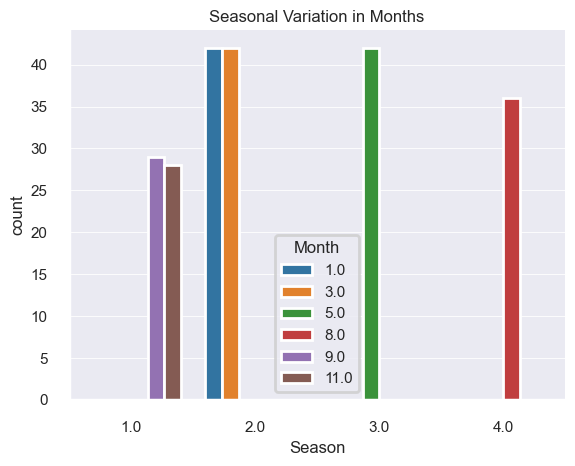

In [ ]:
h = sns.countplot(x="Season",hue='Month' ,data=df)
sns.despine()
plt.title("Seasonal Variation in Months")

2.0    84
1.0    57
3.0    42
4.0    36
Name: Season, dtype: int64


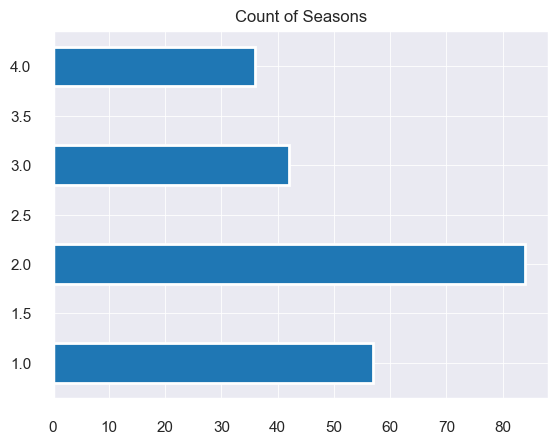

In [ ]:
types = df['Season'].value_counts()
print(types)
plt.barh(types.keys(),types,align='center',height=0.4)
plt.title("Count of Seasons")
plt.show()

1.0     42
3.0     42
5.0     42
8.0     36
9.0     29
11.0    28
Name: Month, dtype: int64


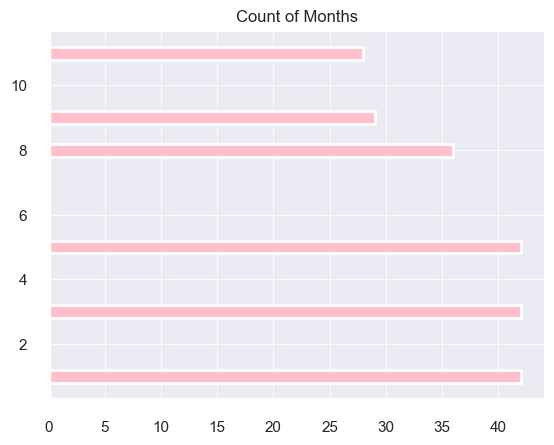

In [ ]:
types = df['Month'].value_counts()
print(types)
plt.barh(types.keys(),types,align='center',color ='pink',height=0.4)
plt.title("Count of Months")
plt.show()

2.0    74
3.0    73
1.0    72
Name: Shore, dtype: int64


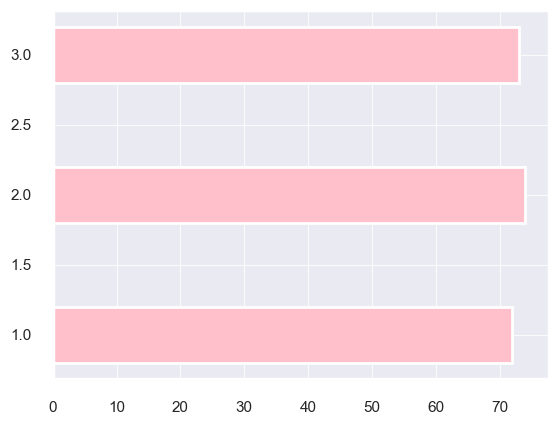

In [ ]:
types = df['Shore'].value_counts()
print(types)
plt.barh(types.keys(),types,align='center',color ='pink',height=0.4)
plt.show()

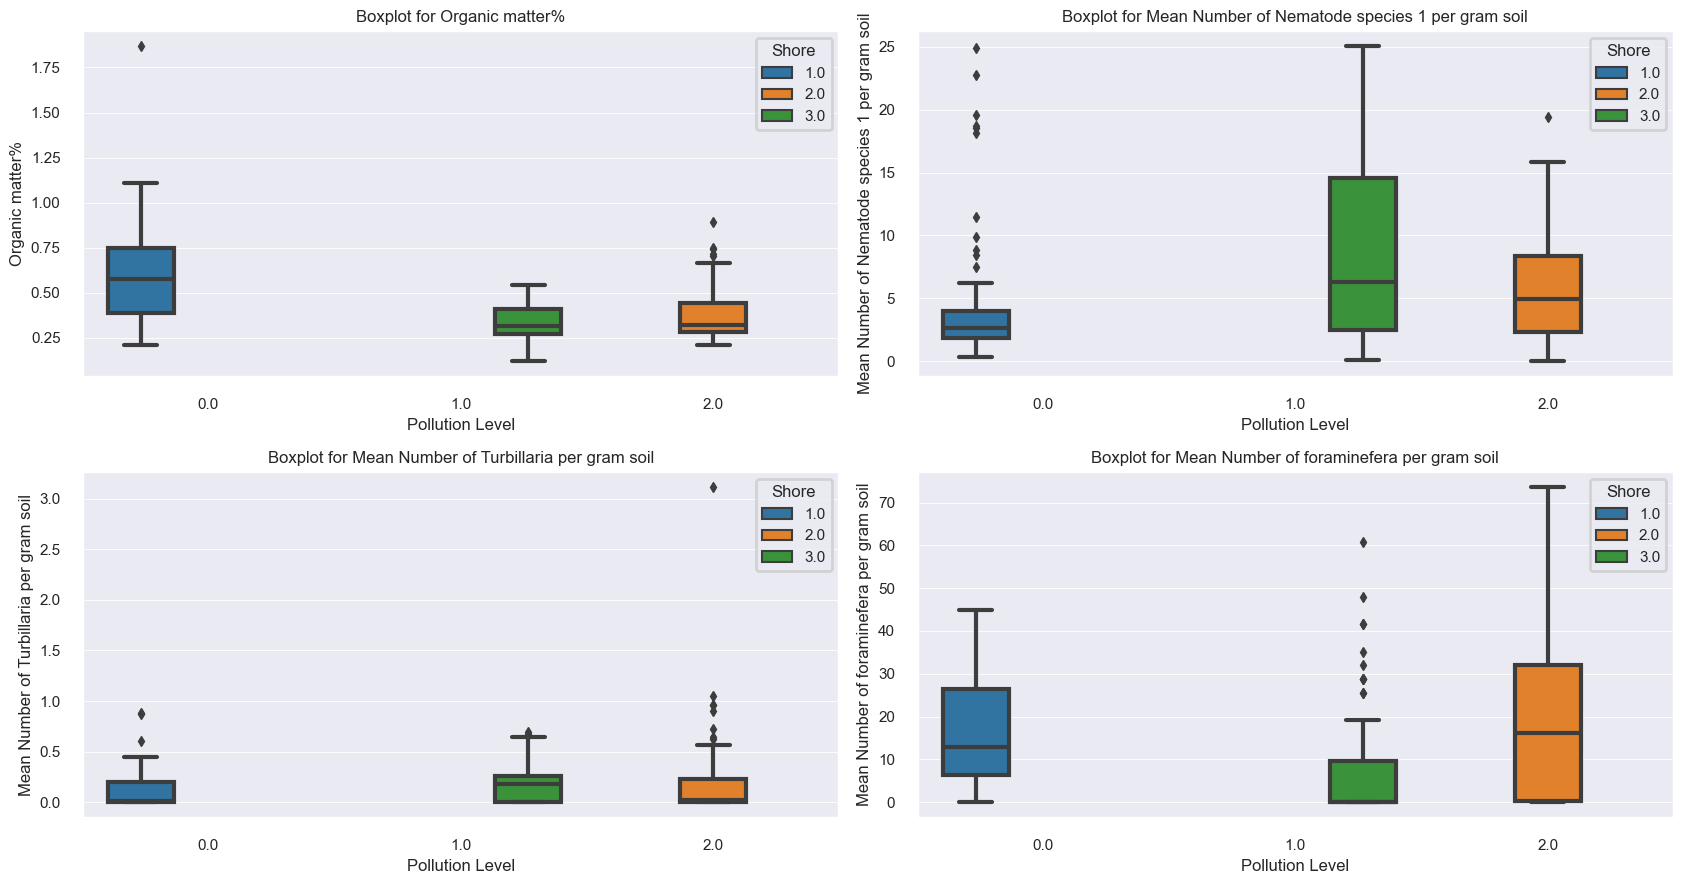

In [ ]:
cols = ['Organic matter%', 
        'Mean Number of Nematode species 1 per gram soil',
        'Mean Number of Turbillaria per gram soil', 
        'Mean Number of foraminefera per gram soil']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17, 9))

for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(x='Pollution Level', y=col, hue='Shore', data=df, ax=ax)
    ax.set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

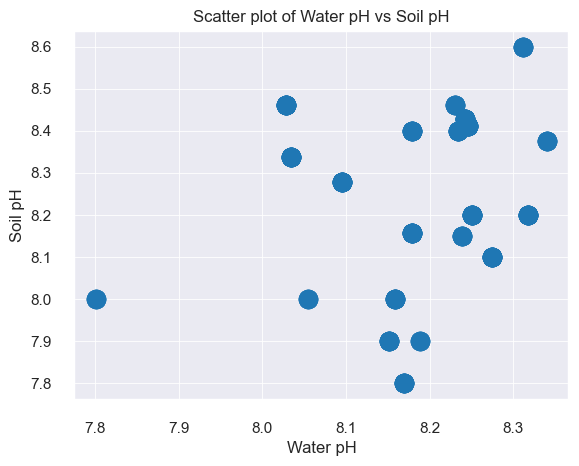

In [ ]:
plt.scatter(df['Water pH'], df['Soil pH'])
plt.xlabel('Water pH')
plt.ylabel('Soil pH')
plt.title('Scatter plot of Water pH vs Soil pH')
plt.show()

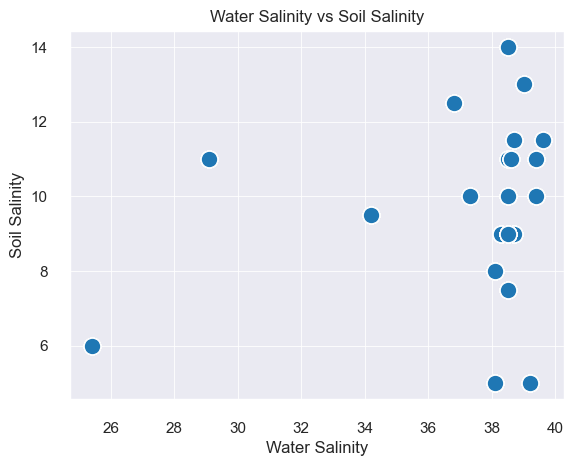

In [ ]:
sns.scatterplot(data=df, x='Water Salinity', y='Soil Salinity')
plt.title('Water Salinity vs Soil Salinity')
plt.show()

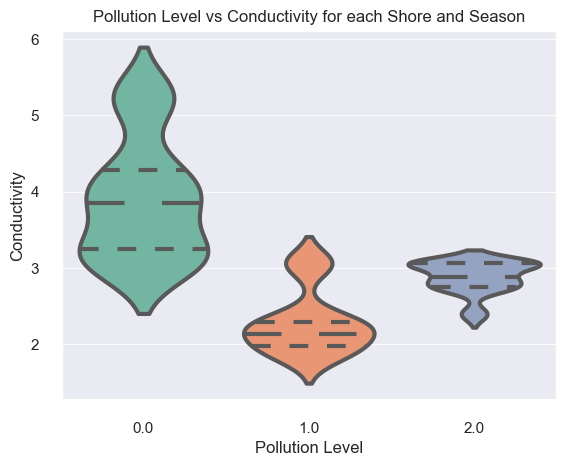

In [ ]:
sns.violinplot(data=df, x='Pollution Level', y='Conductivity', split=True, 
               inner='quart', palette='Set2', hue_order=['A', 'B', 'C', 'D', 'E'], 
               scale='count', scale_hue=True)
plt.title('Pollution Level vs Conductivity for each Shore and Season')
plt.show()

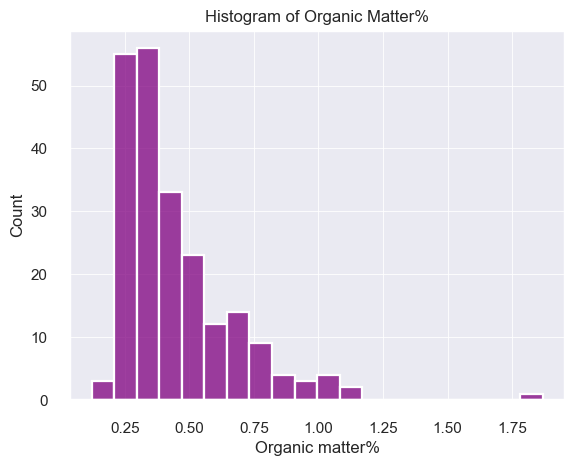

In [ ]:
sns.histplot(data=df, x='Organic matter%', bins=20, color='purple')
plt.title('Histogram of Organic Matter%')
plt.show()

## **Conclusion**

* Overall, the visualizations provide useful insights into the pollution levels, organic matter content, and physical properties of the water and soil samples collected from different shores. The analysis of the data reveals that pollution levels vary across seasons and months, with higher levels in certain months and seasons than others. Additionally, the box plot analysis shows that there is a significant difference in the organic matter content between different shores, with Shore 1 having the highest organic matter content and Shore 3 having the lowest.

* The scatter plot analysis also provides insights into the relationship between different physical properties of the samples, such as water pH and soil pH, and water salinity and soil salinity. It is observed that water pH and soil pH are directly proportional to each other. However, there is no specific trend observed in the scatter plot analysis of water salinity vs soil salinity.

* Finally, the analysis of the pollution level vs conductivity level for each shore reveals interesting findings, such as higher conductivity levels corresponding to lower pollution levels. These findings could have important implications for understanding the factors influencing pollution levels and water quality in the region, and could help guide future efforts to manage and protect the ecosystem.

# **Additional part won't be using :**

We won't use modeling part but I used it as a reference to see if we are working right or we need to change the way we handled our data.

In [ ]:
# Splitting data features & Outputs
X = df.drop('Pollution Level',axis=1)
y = df['Pollution Level']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 120)

In [ ]:

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression 

# Standard Scaler
std_scale = StandardScaler()

X_train = std_scale.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test = std_scale.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.describe()

,Month,Season,Shore,Sample number,Organic matter%,Mean Number of Nematode species 1 per gram soil,Mean Number of Turbillaria per gram soil,Mean Number of foraminefera per gram soil,Mean Number of Nematode species 2 per gram soil,Water pH,...,PP,Conduction,ORP,Specific resistance,Temp ©,Conductivity,H,C-A,C-B,C-C
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,...,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02
mean,1.079806e-16,1.946692e-16,-1.125432e-16,-1.216683e-17,1.779399e-16,-1.399185e-16,1.216683e-17,-7.832395e-17,5.475072e-17,-7.760915e-15,...,1.569521e-15,-5.475072e-16,-1.501843e-16,2.555034e-16,3.224209e-16,-2.828787e-16,2.600659e-16,3.193792e-17,-1.171057e-16,-1.825024e-16
std,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,...,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00
min,-1.410630e+00,-1.203404e+00,-1.195039e+00,-1.500573e+00,-1.389535e+00,-1.083331e+00,-5.714266e-01,-8.828564e-01,-8.233832e-01,-4.026851e+00,...,-1.480548e+00,-4.551705e+00,-1.210068e+00,-5.888799e-01,-1.795015e+00,-1.442184e+00,-1.263381e+00,-1.184897e+00,-1.035875e+00,-1.068379e+00
25%,-8.179627e-01,-1.203404e+00,-1.195039e+00,-9.066715e-01,-6.613751e-01,-7.274852e-01,-5.714266e-01,-8.828564e-01,-6.140845e-01,-3.595531e-01,...,-7.434082e-01,9.661120e-02,-8.789454e-01,-5.095976e-01,-7.535067e-01,-8.032626e-01,-6.803361e-01,-9.354770e-01,-1.035875e+00,-1.027521e+00
50%,-2.252949e-01,-2.218566e-01,6.018180e-02,8.316429e-02,-3.693414e-01,-3.652890e-01,-2.610702e-01,-4.537014e-01,-3.001364e-01,-1.901828e-02,...,-4.229127e-01,3.370413e-01,-3.341953e-01,-3.475860e-01,2.550902e-03,-4.056506e-02,-4.069395e-01,-3.429900e-01,-3.790865e-01,-3.691321e-01
75%,9.600405e-01,7.596907e-01,1.315402e+00,8.750329e-01,3.723686e-01,4.152992e-01,1.810344e-01,6.458262e-01,2.231104e-01,6.358563e-01,...,7.878483e-01,5.240426e-01,7.553048e-01,-1.545509e-01,1.132780e+00,1.751566e-01,9.706170e-01,8.577924e-01,7.923042e-01,8.028204e-01
max,1.552708e+00,1.741238e+00,1.315402e+00,1.930858e+00,5.972431e+00,3.374201e+00,9.045177e+00,4.015540e+00,5.550141e+00,1.620788e+00,...,2.461547e+00,6.576149e-01,1.866168e+00,5.450362e+00,1.383513e+00,2.445273e+00,1.789296e+00,2.053968e+00,2.263482e+00,2.249918e+00


In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

MSE: 1.7804870366754815e-09
MAE: 3.035184598228118e-05
RMSE: 4.219581776284803e-05


In [ ]:
print("r2_score:",metrics.r2_score(y_pred,y_test))

r2_score: 0.9999999969763536


In [ ]:
df.to_csv("Shore Prediction Final.csv")

# **Content Created by** [ApplAi](https://www.linkedin.com/company/applaiasu/)
**Directed by :**
* Director of Machine Learning and Training Department: [Eslam Shouman](https://www.linkedin.com/in/eslam-shouman-0958091b4/)


**Team leader:**

* [Nour Ahmed](https://www.linkedin.com/in/nour-ahmeddd-/)

**Team Members:**
* [Jonathan Mounir](https://www.linkedin.com/in/jonathan-monir/)
* [Sarah Ahmed](https://www.linkedin.com/in/sarahhahmed)
* [Youmna Mohammed](https://www.linkedin.com/in/yomna-muhammed-b964a6270)
* [Habiba Alaa](https://www.linkedin.com/in/habiba-alaa17)